In [2]:
import numpy as np
import gym
import tensorflow_probability as tfp
import tensorflow as tf
import matplotlib.pyplot as plt

import actor_critic

import importlib
from envs.kellycoinflip import KellyCoinflipEnv

In [3]:
initial_wealth = 25.0
edge = 0.6
max_wealth = 250.0
max_rounds = 300
sparse_rewards = False
gamma = 0.99

env_init_fun = lambda : KellyCoinflipEnv(initial_wealth=initial_wealth, edge=edge, 
                                     max_wealth=max_wealth, max_rounds=max_rounds, sparse_rewards=sparse_rewards)
env = actor_critic.EnvBatch(env_init_fun)

In [6]:
entropy_coef=0.1
actor_learning_rate=0.00001
critic_learning_rate=10 * actor_learning_rate

actor = actor_critic.ActorMLP(env=env, scale_model_inputs=False, activation='relu')
critic = actor_critic.CriticMLP(env=env, scale_model_inputs=False, activation='relu')

ac = actor_critic.ActorCritic(
                 env=env,
                 actor=actor, 
                 critic=critic,
                 entropy_coef=entropy_coef,
                 actor_learning_rate=actor_learning_rate,
                 critic_learning_rate=critic_learning_rate,
                 gamma=gamma
                )

### Train the models and display the progress

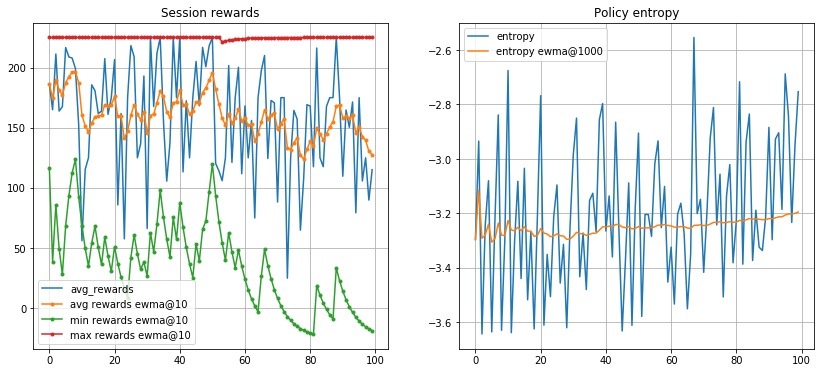


100%|██████████| 100/100 [17:49<00:00,  9.61s/it]

In [7]:
res = ac.train_and_display(n_iters=10001, n_games_per_plot_update=5 )